[![Behavioral Cloning - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)
## Dean Webb - Behavioral Cloning Pipeline
#### Self-Driving Car Engineer Nanodegee - Project 3
---

In this project, my goal will be to use what I've learned about deep neural networks and convolutional neural networks to clone driving behavior. I will train, validate and test a model using [Keras](https://github.com/fchollet/keras). The model will output a steering angle to an autonomous vehicle.

### Project Goals
---
The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior 
* Design, train and validate a model that predicts a steering angle from image data
* Use the model to drive the vehicle autonomously around the first track in the simulator. The vehicle should remain on the road for an entire loop around the track.
* Summarize the results with a written report

### Dependencies
---
The following resources can be found in [Udacity's github repository](https://github.com/udacity/CarND-Behavioral-Cloning-P3):
* drive.py
* video.py
* writeup_template.md

[//]: # (Image References)
[image1]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/cnn-architecture.jpg "Model Visualization"
[image2]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/preprocessing.jpg "Preprocessing Dataset Snippet"
[image3]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/image_augmentation.jpg "Image Augmentation Snippet"
[image4]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/generator_function.jpg "Generator Function"
[image5]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/Network_Parameters.jpg "Network Parameters"
[image6]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/download_dataset.jpg "Download Dataset"
[image7]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/epoch.jpg "Epoch Validation Results"
[image8]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/steering_plots.jpg "Steering Plots"
[image9]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/steering_data.jpg "Steering Signal"
[image10]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/steering_visualization.jpg "Steering Visuals"
[image11]: https://s3-us-west-1.amazonaws.com/sdc-gpu/examples/balance_steering_angles.jpg " Balance Steering Dataset Snippet"


# <font color='red'> Rubric Points</font>

In this section, I consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I address each point in my implementation.  

---
###  <font color='blue'> Files Submitted &amp; Code Quality</font>

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode
My project submission includes the following files:
- model.py containing the script to create and train the neural network
- behavioral-cloning-pipeline-setup.ipynb containing the model.py script for compiling interactively
- drive.py for driving the car in autonomous mode (at 9 mph)
- drive_fast.py for driving the car in autonomous mode (at 18 mph)
- drive_faster.py for driving the car in autonomous mode at full throttle (set to 30 mph)
- model.h5 containing a trained convolution neural network
- output/run_6.mp4 shows a successful run using the my network's model on the vehicle simulator
- output/model_3_run_5.mp4 is an additional successful on the vehicle simulator (in case it's needed)
- writeup_report.md (and writeup_report.pdf) summarizing the results

---
#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing, for example:
```sh
    python drive.py model.h5
```
- Additionally, I provide my `drive_fast.py` and `drive_faster.py` files are also included for testing higher throttle speed (instead of the project expectations of 9 mph)
- The additional files can be a good test against overfitting by requiring the model to train against a wider range of speeds.

---
#### 3. Submission code is usable and readable
- The `model.py` file contains the code for training and saving the convolutional neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.
- Additionally, the submission includes an IPython notebook `behavioral-cloning-pipeline-example.ipynb` for running on a Jupyter server. That file also contains the code for training and saving the convolutional neural network (with added  comments and visualizations).

---

###  <font color='blue'>Model Architecture and Training Strategy - Checklist</font>

#### 1. An appropriate model architecture has been employed
- My model comprises a convolution neural network with various filter sizes (including subsampling) and depths between 32 and 128 (*See e.g., approx lines* **450-554** of `model.py`). More specifically, the architecture presents a slightly modified version of the popular [Nvidia model](https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf).
- The model includes Leaky RELU layers to introduce nonlinearity in between the many of the convolutional and fully-connected layers (*See e.g., lines* **455, 458, 461** of `model.py`).
- The data is normalized in the model using a Keras lambda layer (*See e.g., approx lines* **452** of `model.py`).

---

#### 2. Attempts to reduce overfitting in the model
- The model contains a validation dataset and corresponding validation generator (*See e.g., approx lines* **497-498** of `model.py`) in order to reduce overfitting.
- The model also implements various preprocessing and [image augmentation](https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.jao9k5lb1) techniques as suggested by fellow SDC classmate, Vivek Yadav) which aims to aide in generalization of the neural network. (*See e.g., approx lines* **332-360** of `model.py`)
- The model was trained and validated on different data sets to ensure that the model was not overfitting. The different datasets comprise images taked from various trail runs. The model was also provided sample data from a Udacity trial run.
- The model was then tested and verified by running it through the simulator and ensuring that the vehicle could stay on the track. It successfully stays on the track *indefinitely* when driving at 9 mph (As demonstrated below)

---
#### 3. Model Parameter Tuning
- The model uses an Adam optimizer, so the learning rate was not tuned manually (*See e.g., line* **486** of `model.py`)
- The other hyper parameters where used was a `batch_size = 256` and a number of epochs `nb_epochs = 20`. These parameters collectively trained the neural network to the following results:

![alt text][image7]

---
#### 4. Appropriate training data
- Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road (*See e.g., lines* **48-85** of `model.py`)
<br/>
For more details about how I extracted and preprocessed the training data, please refer to the following section.

---


###  <font color='blue'>Model Architecture and Training Strategy - Summary</font>


#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to perform image augmentation suitable to generate reliable and robust data on the fly, based on the given datasets. The goal of these techniques where to utilize the existing dataset to further mimic predicatable driver behavior and driving conditions. Examples of scenarios that where simulated were:
- Veering close to the edge of the lane (*See* `warp_image` function at lines **107-116** of `model.py`)
- Various lighting conditions (*See* `augment_brightness_camera_images` function at lines **119-134** of `model.py`)
- Random shadow effects crossing the field of view of the camera (*See* `randomly_add_shadow_effect` function at lines **137-158** of `model.py`)
- Generalizing the direction of the steering angle along *the axis of rotation* (*See* `randomly_flip_image` function at lines **107-116** of `model.py`)
<br/>
After the collection process, I had a configurable number of data points to train with due to the generator functions. I used 5,000 samples to begin with whilw I tweaked the network and the hyperparameters. I then preprocessed this data as described above.
<br/>
I finally utilized my augmented data generator to batch out and put 20% of the number of the training samples into a validation set. 
<br/>
I used this training data for training the model. The validation set helped determine if the model was over or under fitting. The ideal number of epochs was about 20, which I found out after finalizing my model and workign through various failed implementations and roadblocks, as described below.

---

#### 2. Final Model Architecture

The final model architecture can be seen in lines **268-322** of `model.py` and was auto-generated by Keras with the following layers and layer parameter sizes:

<img src="examples/Network_Parameters.jpg" width="324"/>

---

As noted above, the architecture presents a slightly modified version of the popular [Nvidia model](https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf). The following is a visualization of the original Nvidia model:
<img src="examples/cnn-architecture.jpg" width="324" />

To finish off, the final architecture advantageouesly used an Adam optimizer so that manually training the learning rate wasn't necessary.
![alt text][image7]

---

#### 3. Creation of the Training Set & Training Process

- For training the model, the first step was to download and extract the dataset from an Amazon S3 bin and extract the dataset into the appropriate directories for training.

---
![alt text][image6]

Once the dataset was extracted, I began the preprocessing and image augmentation techniques described earlier.

---
![alt Preprocessing][image2]

---
![alt Image Augmentation Functions][image3]

- To capture good driving behavior in the simulator, I first recorded three laps (on track one) and combined it with the Udacity provided dataset, using a random selection of the three cameras in use while driving.
<br/>
- I also reversed direction and drove the course in reverse. This was used to help the code generalize the steering angles irrespective of the direction on the course.
<br/>
- To augment the data correctly, I used a scaled steering angle and either added or subtracted an offset value.
<br/>
- I then recorded the vehicle recovering from the left side and right sides of the road back to center so that the vehicle would learn to veer back towards the center while driving. Example data visualizations of the processes mentiond above can be seen below. This is for the purposes of satifying the project requirements:

---

![][image8]

---

---

![][image9]

---

---

![][image10]

---

As can be seen, the data read in from the simulator track comprises a left, right, and center camera, all with a corresponding steering angle with respect to their position. To further augment the data set, we can take advantage of the multiple cameras to further bolster our dataset. I utilized this technique and I also also flipped images and angles thinking that this would mimic the actual data set results of driving the course in reverse. This technique appears to be reliable data, as seen above.

Furthermore, as can be seen in the graph above, I took into acount that majority of the dataset had a zero steering angle. I simply removed those values and instead intend to rely on a smoother distribution. As noted in my prior review, the straight angle (zero degree) has has a much higher likelihood to feed into model, where the real turn looks becomes very minor to system. This of course is accounted for by my image augmentation, and by me removing all data with a steering angle less than .25 (as seen below):

---

![][image11]

---

It becomes evident that it will be necessary to balance this dataset prior its use. If we use the data without further processing, the model would predict new steering angles with a very strong bias towards going straight, which would become problematic when turning.
<br>
- I use a convolution neural network model similar to the end-to-end Nvidia architecture, but I initially started out with the commai AI model, I had many initial problems with that model, but it was likely due to other issues instead of the model's architecture itself. I thought this model might be appropriate because many SDC students had successful results training with the Nvidia model. I personally had the goal of creating and training a model that was robust enough to drive on multiple tracks. 
<br>
- In order to gauge how well the model was working, I split my image and steering angle data into a training and validation sets and trained the model using a generator function:

![alt Image Augmentation Functions][image3]

---
<br>
- The final step was to run the simulator to see how well the car was driving around track one. I found that my first Comma AI would successfully train until there was a low mean squared error on the training set and on the validation set, but the resulting weights file was enormous! (over 800 MB). While I wasn't sure, this implied that I ws doing something very wrong.
<br>
- Somewhat frustrated, I then set out to discover more advanced image augmentation techniques and studied the advanced lane line tracking concepts before revisiting my model. This turned out to be a good decision because I had a much better understanding of the image augmentation techniques and quickly found my errors in my augmentation methods. For example, the biggest problem with my model before was that I wasn't scaling the image or the steering angles correctly. As a result, the car would either not drive at all, or behave erratically on the track. The issue with image scaling forced me to eliminate any resizing, which resulted in much longer training time. I was faced with a problem of not being able to continue progress, as the training time tooks simply too long to effectively test and debug.
<br>
- To overcome this obstacle, I wrote a [Docker script](https://medium.com/@deanofthewebb/dockerized-installation-of-tensorflow-1-0-from-source-with-gpu-support-77646cd25f92#.58prkfhl0) to run a container on AWS. At the time of completion, my script correctly compiled and installed Tensorflow 1.0 (with GPU) from source. However, there are currently some minor breaking changes introduced from AWS updating the Nvidia drivers for g2.8xlarge instances (from 367.XX to 375.XX). This upgrade broke support for nvidia-driver, however, the p2 instances seemed unaffected.
<br>
- Finally, after revisiting the project with GPU support a better understanding, I was able to successfully correct my errors and complete the project, the vehicle is able to drive autonomously **indefinitely** around the track without leaving the road.

# <font color='red'> Code Implementation </font> 
The following sections contain the code used to train the dataset and predict steeering angles

### Dataset - Load Data

Start by importing the simulator data from the training_data directory. To avoid storing large files on github, I used an S3 bucket to store my images and auto-download when the directory does not exist.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import gzip
import urllib.request
import zipfile
import os
import shutil
import csv
import numpy as np
import math
import matplotlib
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def maybe_download(filename):
    zipped_file = os.path.join(WORKING_DIRECTORY, DATASET_FILE)
    if not os.path.exists(os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY)):
        if not os.path.exists(WORKING_DIRECTORY):
            os.mkdir(WORKING_DIRECTORY)
        
        #Download file from S3 bucket if not found locally
        if not os.path.exists(os.path.join(WORKING_DIRECTORY, filename)):
            filepath = os.path.join(WORKING_DIRECTORY, DATASET_FILE)
            zipped_file, _ = urllib.request.urlretrieve(SOURCE_URL, filepath)
            statinfo = os.stat(filepath)
            print('Succesfully downloaded:', SOURCE_URL, '| % d MB.' % int(statinfo.st_size*1e-6))
            
        #Unzip Downloaded File
        unzip_file(zipped_file, os.path.join(WORKING_DIRECTORY))

In [28]:
# Dataset Parameters
DRIVING_LOG_CSV = 'driving_log.csv'
DATASET_DIRECTORY = 'data/'
DATACACHE_DIRECTORY = 'datacache/'
DATASET_FILE = 'driving_data.zip'
WORKING_DIRECTORY = 'data/'
SOURCE_URL = 'https://s3-us-west-1.amazonaws.com/sdc-gpu/data.zip'

## Image Augmentation Parameters ##
CORRECTION_ANGLE = 0.25
IMAGE_RES = (160, 320, 3)
NB_AUGMENTED_SAMPLES = 20000
YCROP_STOP = IMAGE_RES[0]-25
YCROP_START = math.floor(IMAGE_RES[0]/5)
XCROP_START = 0
XCROP_STOP = IMAGE_RES[0]
DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH = (64, 64, 3)
DEFAULT_RESOLUTION = (DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH) if DEFAULT_DEPTH > 1 else (DEFAULT_LENGTH, DEFAULT_WIDTH)

# Training Parameters
DATACACHE_DIRECTORY = os.path.join(WORKING_DIRECTORY, 'datacache/')
MODEL_DATA = 'model.h5'


In [4]:
def unzip_file(zipped_file, destination):
    print('Extracting zipped file: ', zipped_file)
    zipf = zipfile.ZipFile(zipped_file)
    zipf.extractall(destination)
    print('Loaded and extracted zipfile',zipf)
    zipf.close()

    #Remove Zip File
    destination = os.path.join(WORKING_DIRECTORY,DATASET_FILE)
    if os.path.exists(destination):
        shutil.rmtree(destination, ignore_errors=True)

In [5]:
def process_img(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

In [6]:
if os.path.exists(WORKING_DIRECTORY):
    shutil.rmtree(WORKING_DIRECTORY, ignore_errors=True)
if os.path.exists(DATASET_DIRECTORY):
    shutil.rmtree(DATASET_DIRECTORY, ignore_errors=True)
        
maybe_download(DATASET_FILE)

Succesfully downloaded: https://s3-us-west-1.amazonaws.com/sdc-gpu/data.zip |  471 MB.
Extracting zipped file:  data/driving_data.zip
Loaded and extracted zipfile <zipfile.ZipFile filename='data/driving_data.zip' mode='r'>


In [7]:
csv_path = os.path.join(WORKING_DIRECTORY,DATASET_DIRECTORY,DRIVING_LOG_CSV)
drive_data = pd.read_csv(csv_path, header=0, names=['center','left','right','steering','throttle','break','direction'], index_col = False)
drive_data['direction'] = pd.Series('s', index=drive_data.index)

In [8]:
drive_data.head()

,center,left,right,steering,throttle,break,direction
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,s
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,s
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,s
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,s
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,s


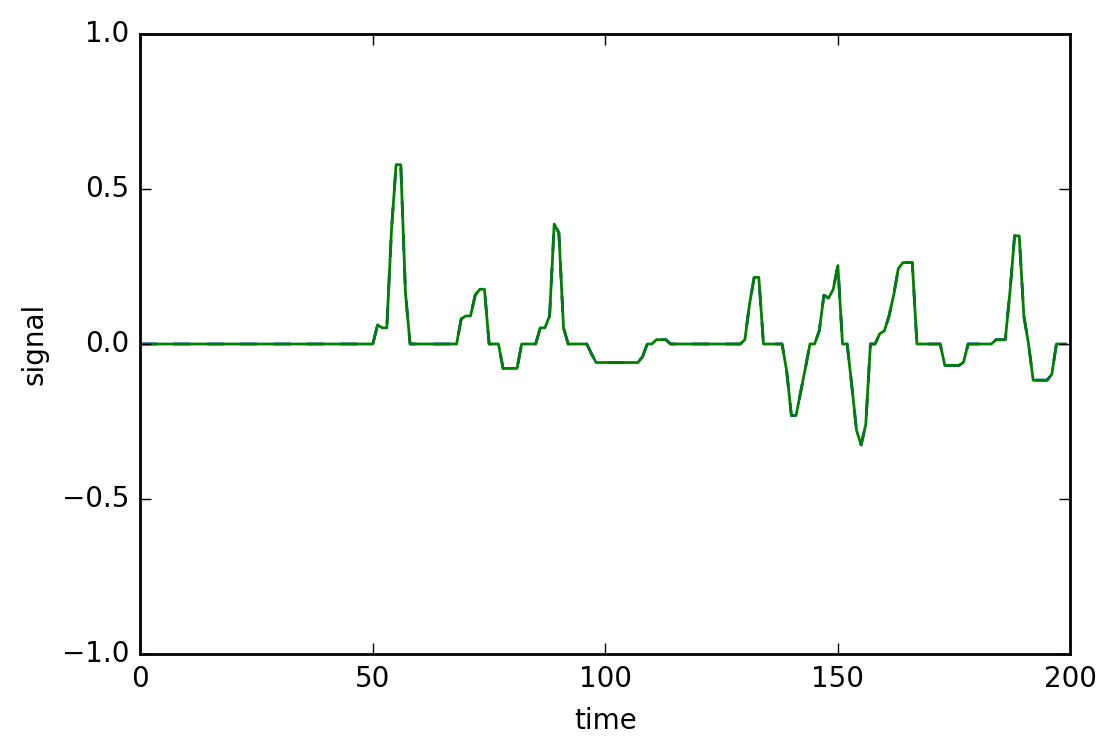

In [9]:
len_plt = 200
rev_steer_s = np.array(drive_data.steering,dtype=np.float32)
t_s = np.arange(len(rev_steer_s))
x_s = np.array(drive_data.steering)
y_s = rev_steer_s
steer_sm_s = rev_steer_s
plt.plot(t_s[0:len_plt],x_s[0:len_plt],'--',t_s[0:len_plt],y_s[0:len_plt]);
plt.xlabel('time')
plt.ylabel('signal')
plt.ylim(-1,1);
drive_data['steer_sm'] = pd.Series(steer_sm_s, index=drive_data.index)

In [10]:
ind = drive_data['throttle']>.25
drive_data= drive_data[ind].reset_index()

### Preprocessing - Image Augmentation

Implement various [Image Augmentation](https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.jao9k5lb1) and Dataset generation techniques as described by Vivek Yadav.

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

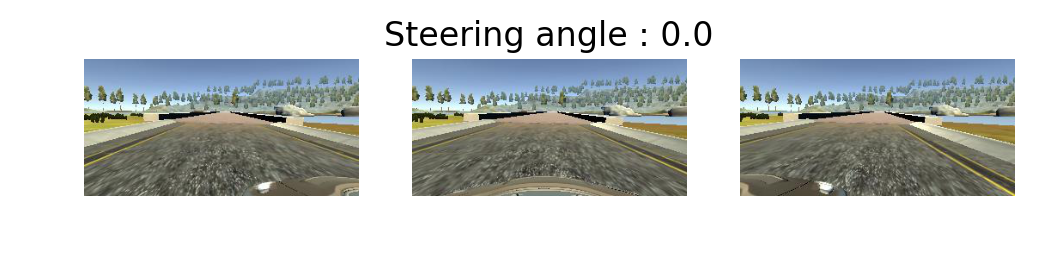

In [11]:
index = 29
        
filepath_l = drive_data['left'][index].strip()
filepath_r = drive_data['right'][index].strip()
filepath_c = drive_data['center'][index].strip()

full_path_l = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_l)[-1].strip())
full_path_r = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_r)[-1].strip())
full_path_c = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_c)[-1].strip())

if os.path.exists(full_path_c):
    image_c = process_img(full_path_c)
if os.path.exists(full_path_r):
    image_r = process_img(full_path_r)
if os.path.exists(full_path_l):
    image_l = process_img(full_path_l)
    

plt.figure()
plt.subplot(1,3,1)
plt.imshow(image_l+.5);
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(image_c+.5);
plt.axis('off')
plt.title('Steering angle : '+ str(np.round(y_s[index]*25,2) ));
plt.subplot(1,3,3)
plt.imshow(image_r+.5);
plt.axis('off');

In the figures below, we will test tested how to augment left and right camera angle to match center panel data, using a steering angle offset of `0.25`.

This shift of `0.25` radians corresponsds to `6.25` degrees. The right camera would have to move left to come to center, and left camera would have to move right to come to center.

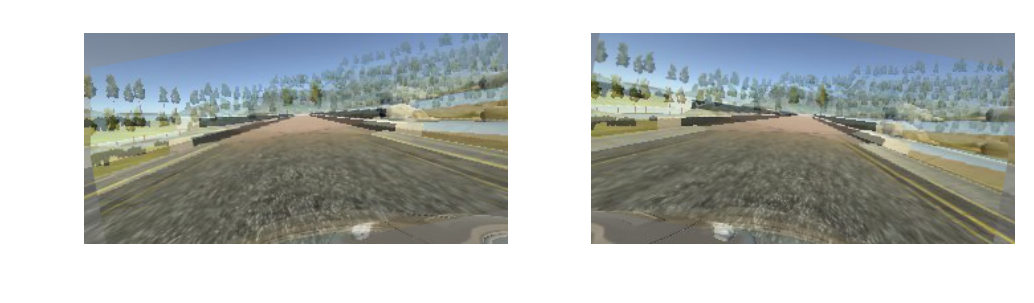

In [12]:
angle_rot = 10
trans_camera = 5
rows,cols,ch = image_c.shape

Mt = np.float32([[1,0,-trans_camera],[0,1,0]])
Mr = cv2.getRotationMatrix2D((cols/2,rows/2),-angle_rot,1)
rows,cols,ch = image_c.shape
image_c_mod = cv2.warpAffine(image_c,Mr,(cols,rows))
image_c_mod = cv2.warpAffine(image_c_mod,Mt,(cols,rows))
image_rc_mod = cv2.addWeighted(image_r,0.5,image_c_mod,0.5,0)

Mt = np.float32([[1,0,trans_camera],[0,1,0]])
Mr = cv2.getRotationMatrix2D((cols/2,rows/2),angle_rot,1)
rows,cols,ch = image_c.shape
image_c_mod = cv2.warpAffine(image_c,Mr,(cols,rows))
image_c_mod = cv2.warpAffine(image_c_mod,Mt,(cols,rows))
image_lc_mod = cv2.addWeighted(image_l,0.5,image_c_mod,0.5,0)

plt.subplot(1,2,1)
plt.imshow(image_lc_mod+.5)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_rc_mod+.5)
plt.axis('off');

In [13]:
def plot_camera_images(data, steer_sm, index, deg = 0):
    filepath_l = data['left'][0].strip()
    filepath_r = data['right'][index].strip()
    filepath_c = data['center'][index].strip()
   
    full_path_l = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_l)[-1].strip())
    full_path_r = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_r)[-1].strip())
    full_path_c = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath_c)[-1].strip())

    if os.path.exists(full_path_c):
        image_c = process_img(full_path_c)
    else:
        print('Image Path:', full_path_c, "does not exist")

    if os.path.exists(full_path_r):
        image_r = process_img(full_path_r)
    else:
        print('Image Path:', full_path_r, "does not exist")

    if os.path.exists(full_path_l):
        image_l = process_img(full_path_l)
    else:
        print('Image Path:', full_path_l, "does not exist")

    plt.subplot(1,3,1)
    plt.imshow(image_l+.5);
    plt.axis('off')
    if deg==0:
        plt.title('Steer:'+ str(np.round(steer_sm[index]+.25,2) ));
    else:
        plt.title('Steer:'+ str((np.round((steer_sm[index]+.1)*180/np.pi,2) )))
    plt.subplot(1,3,2)
    plt.imshow(image_c+.5);
    plt.axis('off')
    if deg==0:
        plt.title('Steer:'+ str(np.round(steer_sm[index],2) ));
    else:
        plt.title('Steer:'+ str(np.round(steer_sm[index]*180/np.pi,2) ));
    plt.subplot(1,3,3)
    plt.imshow(image_r+.5);
    plt.axis('off');
    if deg==0:
        plt.title('Steer:'+ str(np.round(steer_sm[index]-.25,2) ));
    else:
        plt.title('Steer:'+ str((np.round((steer_sm[index]-.1)*180/np.pi,2) )))


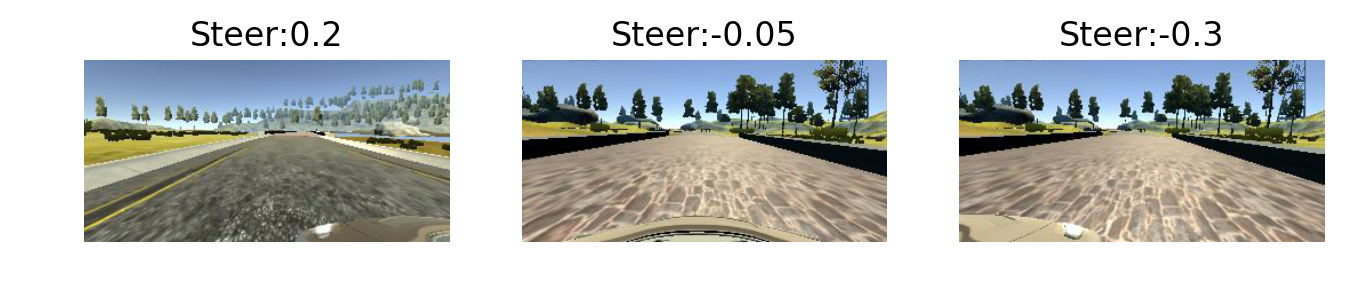

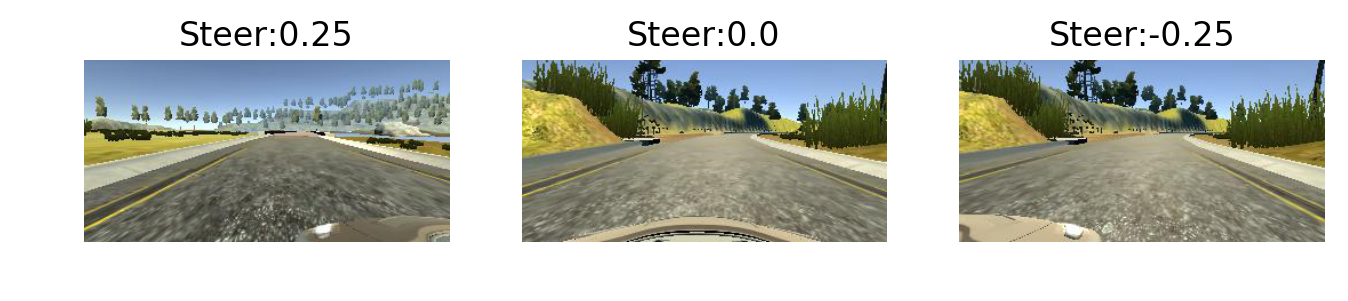

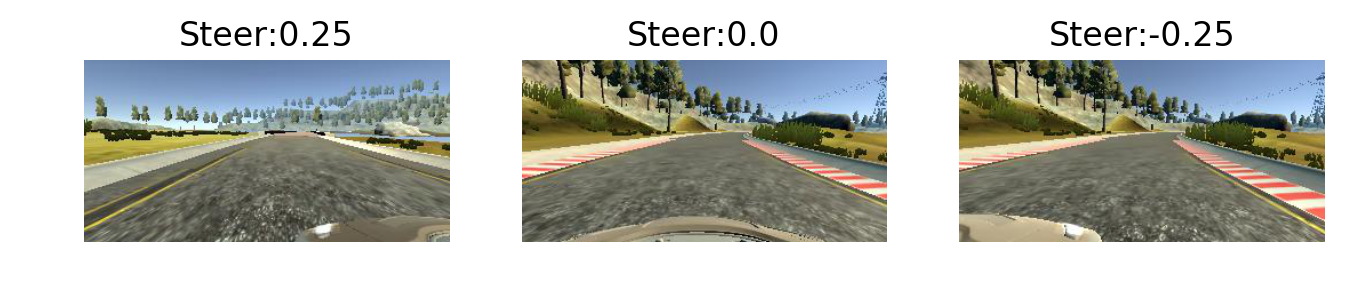

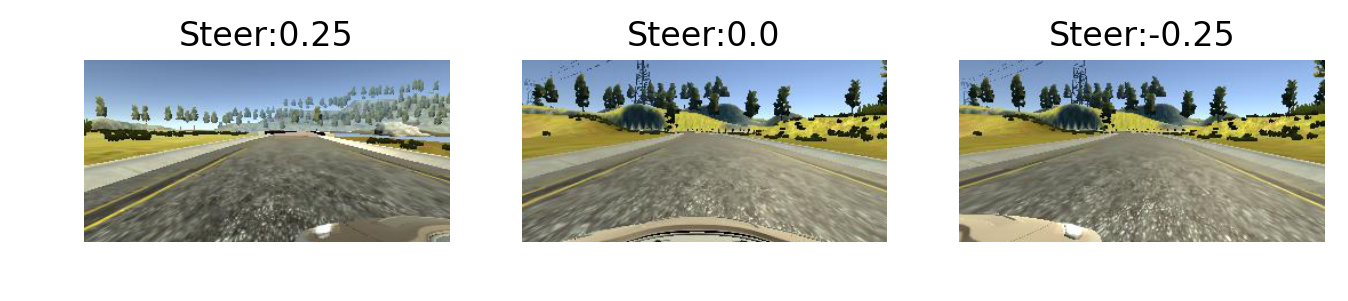

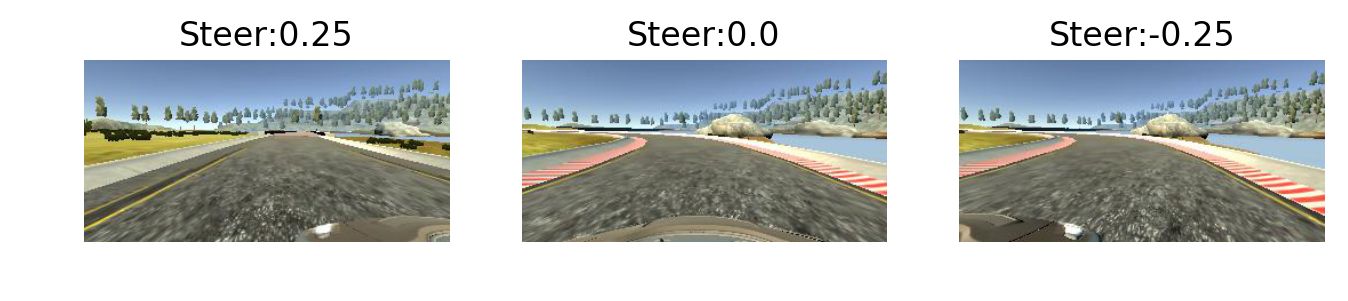

In [16]:
for i in range(5):
    index = np.random.randint(len(drive_data)-1)
    plt.figure(figsize=(8,16))
    plot_camera_images(drive_data,steer_sm_s,index)
    plt.show()

In [17]:
def resize_image(image):
    img = np.copy(image)
    shape = img.shape
    # Crop numpy array of image to remove extraneous pixels
    img = img[YCROP_START:YCROP_STOP, XCROP_START:XCROP_STOP]
    scaled = cv2.resize(img,(DEFAULT_LENGTH, DEFAULT_WIDTH), interpolation=cv2.INTER_AREA)    
    return scaled

In [18]:
def get_scaled_features(target_fields = ['steering', 'throttle', 'brake', 'speed']):
    data=pd.read_csv(os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, DRIVING_LOG_CSV))
    # Store scalings in a dictionary for converting back later
    scaled_feats = {}
    
    for each in target_fields:
        # Calculate the mean and std_dev of the steering angle for image augmentation
        mean, std = data[each].mean(), data[each].std()

        scaled_feats[each] = [mean, std]
        data.loc[:, each] = (data[each] - mean)/std
    return data, scaled_feats

In [19]:
def warp_image(image,steer,trans_range):
    shape = image.shape
    # Translation
    delta_x = trans_range*np.random.uniform()-trans_range/2
    steering_angle = steer + delta_x/trans_range*2*.2
    delta_y = 40*np.random.uniform()-40/2
    # TRANSLATION MATRIX
    Trans_M = np.float32([[1,0,delta_x],[0,1,delta_y]])
    warped_image = cv2.warpAffine(image,Trans_M,(shape[0],shape[1]))    
    return warped_image,steering_angle

In [20]:
def randomly_add_shadow_effect(image):   
    start_y = IMAGE_RES[0]*np.random.uniform()
    start_x = 0
    stop_x = IMAGE_RES[1]
    stop_y = IMAGE_RES[0]*np.random.uniform()
    s_ch = 1
    image_hls = cv2.cvtColor(np.copy(image),cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-start_x)*(stop_y-start_y) -(stop_x - start_x)*(Y_m-start_y) >=0)] = 1
    
    if np.random.randint(2) == 1:
        random_bright = .5
        cond1 = shadow_mask == 1
        cond0 = shadow_mask == 0
        if np.random.randint(2)==1:
            image_hls[:,:,s_ch][cond1] = image_hls[:,:,s_ch][cond1]*random_bright
        else:
            image_hls[:,:,s_ch][cond0] = image_hls[:,:,s_ch][cond0]*random_bright       
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)
    return image

In [21]:
def randomly_flip_image(image, measurement):
    if (np.random.randint(2) == 0):
        image = cv2.flip(image,1)
        measurement = -measurement
    return image, measurement

In [22]:
def augment_brightness_camera_images(image):
    v_ch = 2
    img = np.copy(image)
    hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hsv_img = np.float64(np.copy(hsv_img))
    
    random_light = .5+np.random.uniform()
    v_channel = hsv_img[:,:,v_ch]
    hsv_img[:,:,v_ch] = v_channel*random_light
    
    v_channel = hsv_img[:,:,v_ch]
    hsv_img[:,:,v_ch][v_channel>255] = 255
    hsv_img = np.uint8(np.copy(hsv_img))
    
    aug_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
    return img

In [23]:
def preprocess_image(line_data, features):    
    random_index = np.random.randint(3)    
    if (random_index == 0):
        filepath = line_data['left'][0].strip()
        shifted_ang = CORRECTION_ANGLE
    if (random_index == 1):
        filepath = line_data['center'][0].strip()
        shifted_ang = 0.
    if (random_index == 2):
        filepath = line_data['right'][0].strip()
        shifted_ang = -CORRECTION_ANGLE
        
    #Scale Steering Angle back up
    mean, std = features['steering']
    steering_angle = float(line_data['steering'][0])*std + mean + shifted_ang
            
    full_path = os.path.join(WORKING_DIRECTORY, DATASET_DIRECTORY, 'IMG',os.path.split(filepath)[-1].strip())
    if os.path.exists(full_path):
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image, steering_angle = warp_image(image, steering_angle, 100)
        image = augment_brightness_camera_images(image)
        image = randomly_add_shadow_effect(image)
        image, steering_angle = randomly_flip_image(image, steering_angle)
        image = resize_image(image)
    else:
        print('Image Path:', full_path, "does not exist")

    return image, steering_angle

In [26]:
import pandas as pd
def generate_augmented_training_batch(pr_threshold = 1, batch_size = 256):
    target_fields = ['steering', 'throttle', 'brake', 'speed']
    data, scaled_feats = get_scaled_features(target_fields)
    # Separate the data by features and targets
    camera_data, sensor_data = data.drop(target_fields, axis=1), data[target_fields]
    batch_images = np.zeros((batch_size, DEFAULT_RESOLUTION[1], DEFAULT_RESOLUTION[0], DEFAULT_RESOLUTION[2]))
    batch_measurements = np.zeros(batch_size)
    while 1:
        for i_batch in range(batch_size):
            index = np.random.randint(len(data)) 
            line_data = data.iloc[[index]].reset_index()
            keep_pr = 0
            while keep_pr == 0:
                image, measurement = preprocess_image(line_data, scaled_feats)

                pr_unif = np.random
                if (abs(measurement) < .1):
                    pr_val = np.random.uniform()
                    if (pr_val > pr_threshold):
                        keep_pr = 1
                else:
                    keep_pr = 1
            batch_images[i_batch] = image
            batch_measurements[i_batch] = measurement
        yield batch_images, batch_measurements

### Train the Network - Implemented with Modified [Nvidia Architecture](https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf)

In [27]:
import tensorflow as tf
tf.python.control_flow_ops = tf
from keras.models import Model
import keras.backend as K
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Activation, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam
from keras.layers import Cropping2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import sys

#Hyperparameters
batch_size = 256
nb_epochs = 1

## Using modified Nvidia model ## 
inputs = Input(shape=DEFAULT_RESOLUTION)
lambda_1 = Lambda(lambda x: x/127.5 -1.)(inputs)

conv_1 = Convolution2D(24, 5, 5, subsample=(2, 2), init='glorot_uniform',border_mode='valid')(lambda_1)
lrelu_1 = LeakyReLU()(conv_1)

conv_2 = Convolution2D(36, 5, 5, subsample=(2, 2), init='glorot_uniform',border_mode='valid')(lrelu_1)
lrelu_2 = LeakyReLU()(conv_2)

conv_3 = Convolution2D(48, 5, 5, subsample=(2, 2), init='glorot_uniform',border_mode='valid')(lrelu_2)
lrelu_3 = LeakyReLU()(conv_3)

conv_4 = Convolution2D(64, 3, 3, subsample=(1, 1), init='glorot_uniform',border_mode='valid')(lrelu_3)
lrelu_4 = LeakyReLU()(conv_4)

conv_5 = Convolution2D(64, 3, 3, subsample=(1, 1), init='glorot_uniform',border_mode='valid')(lrelu_4)
lrelu_5 = LeakyReLU()(conv_5)

flatten = Flatten()(lrelu_5)
fc_1 = Dense(1164)(flatten)
lrelu_6 = LeakyReLU()(fc_1)

fc_2 = Dense(100)(lrelu_6)
lrelu_7 = LeakyReLU()(fc_2)

fc_3 = Dense(50)(lrelu_7)
lrelu_8 = LeakyReLU()(fc_3)

fc_4 = Dense(10)(lrelu_8)
lrelu_9 = LeakyReLU()(fc_4)

# Predictions
predictions = Dense(1, activation='tanh')(lrelu_9) # Add activation function to keep values within -1 and 1

model = Model(input=inputs, output=predictions)
adam = Adam(lr=0.0007, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='mse',
             optimizer=adam,
             metrics=['msle'])
print(model.summary())

callback1 = ModelCheckpoint('weights.{epoch:02d}-{loss:.2f}.hdf5', monitor='loss',
                            verbose=0, save_best_only=False, mode='auto')        
pr_threshold = 1
for e in range(nb_epochs):
    generator = generate_augmented_training_batch(pr_threshold, batch_size)
    validation_generator = generate_augmented_training_batch(pr_threshold, batch_size)
    model.fit_generator(generator, samples_per_epoch=NB_AUGMENTED_SAMPLES, 
                        nb_epoch=1, callbacks=[callback1], verbose=1, 
                        validation_data=validation_generator, 
                        nb_val_samples=np.int(NB_AUGMENTED_SAMPLES*.2))
    pr_threshold = 1/((e+1)*1.)

model.save(MODEL_DATA)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 64, 64, 3)     0                                            
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 64, 64, 3)     0           input_2[0][0]                    
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 30, 30, 24)    1824        lambda_2[0][0]                   
____________________________________________________________________________________________________
leakyrelu_10 (LeakyReLU)         (None, 30, 30, 24)    0           convolution2d_6[0][0]            
___________________________________________________________________________________________

/Users/deanmwebb/anaconda/envs/sdc_dev/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


20224/20000 [==============================] - 582s - loss: 0.0830 - mean_squared_logarithmic_error: 0.0249 - val_loss: 0.0710 - val_mean_squared_logarithmic_error: 0.0194


In [31]:
## Save parameters to picklefile for drive.py
target_fields = ['steering', 'throttle', 'brake', 'speed']
_, scaled_feats = get_scaled_features(target_fields)
DATACACHE_DIRECTORY = os.path.join(WORKING_DIRECTORY, 'datacache/')
override_datacache = True
os.makedirs(DATACACHE_DIRECTORY, exist_ok=True)
keras_pickle = os.path.join(DATACACHE_DIRECTORY,"keras_pickle.p")
if override_datacache or not os.path.exists(keras_pickle): 
    keras_hyperparameters = {'scaled_feats': scaled_feats,
                             'SCALED_LENGTH':DEFAULT_LENGTH,
                             'SCALED_WIDTH':DEFAULT_WIDTH,
                             'IMAGE_RES':IMAGE_RES,
                             'YCROP_STOP':YCROP_STOP,
                             'YCROP_START':YCROP_START,
                             'XCROP_STOP':XCROP_STOP,
                             'XCROP_START':XCROP_START,
                             'CORRECTION_ANGLE':CORRECTION_ANGLE
                            }
    pickle.dump(keras_hyperparameters, open(keras_pickle, "wb"))